Loading BACE dataset...
Selecting molecular descriptors...
Using 15 descriptors: ['MW', 'AlogP', 'HBA', 'HBD', 'RB', 'HeavyAtomCount', 'ChiralCenterCount', 'RingCount', 'PSA', 'First Zagreb (ZM1)', 'Wiener (W)', 'Balaban distance connectivity index (J)', 'Topological diameter (TD)', 'Topological radius (TR)', 'Petitjean 2D shape (PJ2DS)']
Train set: (1210, 16), Validation set: (303, 16)
Class distribution in train set: {0: 657, 1: 553}
Class distribution in validation set: {0: 165, 1: 138}

Feature correlations with target (BACE activity):
                                    feature  correlation
9                        First Zagreb (ZM1)     0.311202
5                            HeavyAtomCount     0.289034
0                                        MW     0.276120
2                                       HBA     0.243921
10                               Wiener (W)     0.218157
13                  Topological radius (TR)     0.208723
12                Topological diameter (TD)     0.20556

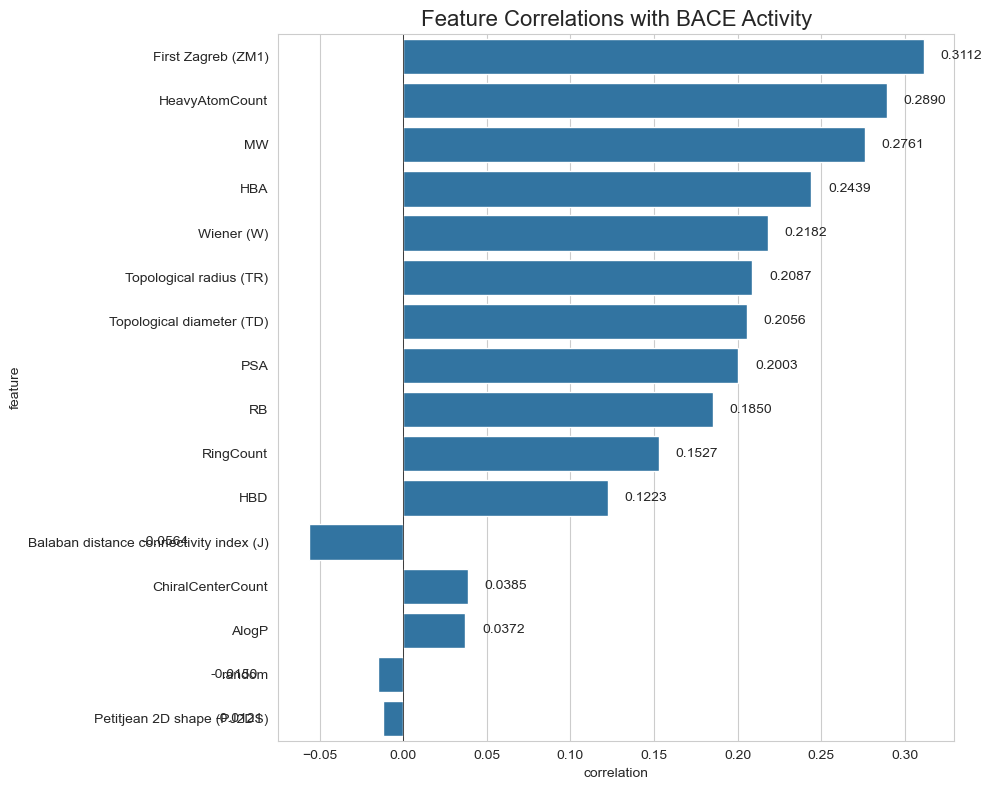


Training Random Forest classification model...
Training Accuracy: 1.0000
Validation Accuracy: 0.7261
Training AUC-ROC: 1.0000
Validation AUC-ROC: 0.8213
OOB Score: 0.7876

Confusion Matrix (Validation Set):
[[135  30]
 [ 53  85]]


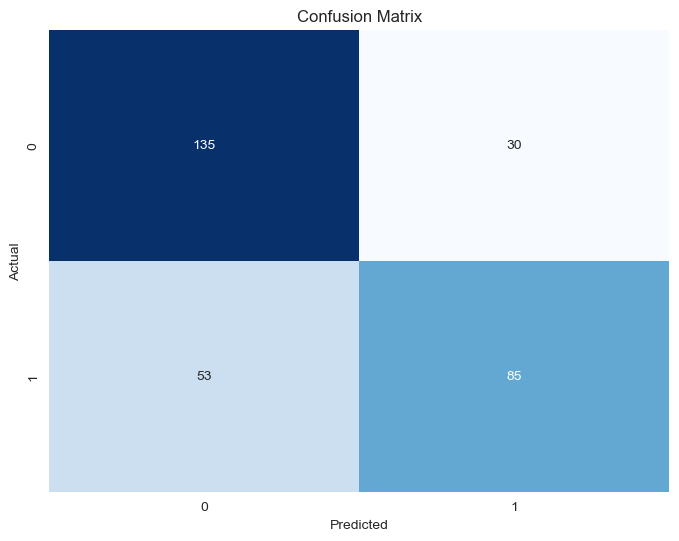


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.82      0.76       165
           1       0.74      0.62      0.67       138

    accuracy                           0.73       303
   macro avg       0.73      0.72      0.72       303
weighted avg       0.73      0.73      0.72       303


Calculating default Scikit-learn feature importances...
Features ranked by default importance:
                                    feature  feature_importance
0                                       PSA            0.112297
1                        First Zagreb (ZM1)            0.112072
2   Balaban distance connectivity index (J)            0.108571
3                                        MW            0.093206
4                                Wiener (W)            0.087563
5                                     AlogP            0.084166
6                                    random            0.078745
7                                       H

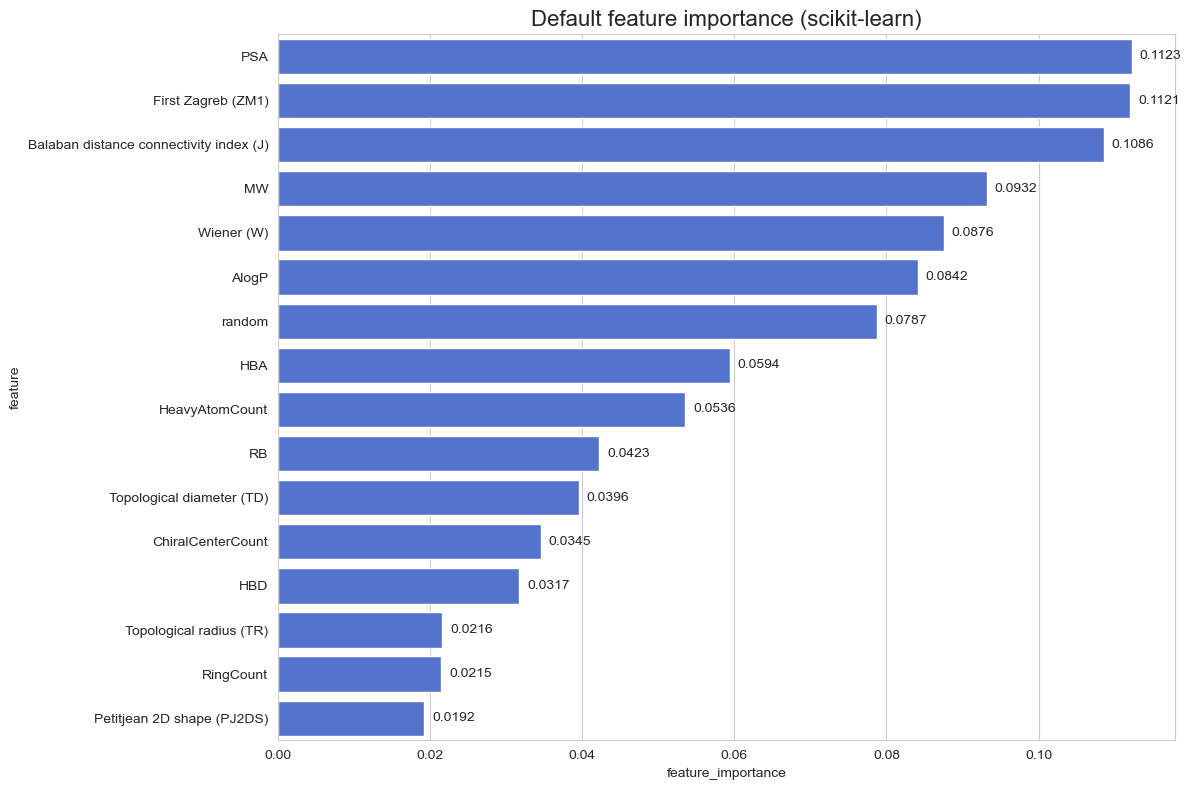


Random feature in default importance:
Rank: 7 out of 16 features
Top percentile: 56.25%
Importance value: 0.078745

Calculating permutation feature importance...
Features ranked by permutation importance:
                                    feature  feature_importance
0   Balaban distance connectivity index (J)            0.011342
1                                       PSA            0.008122
2                                       HBA            0.006428
3                        First Zagreb (ZM1)            0.006133
4                                    random            0.003458
5                         ChiralCenterCount            0.002435
6                                     AlogP            0.002123
7                                Wiener (W)            0.000532
8                                        MW            0.000475
9                                        RB            0.000228
10                                      HBD            0.000077
11                Topologi

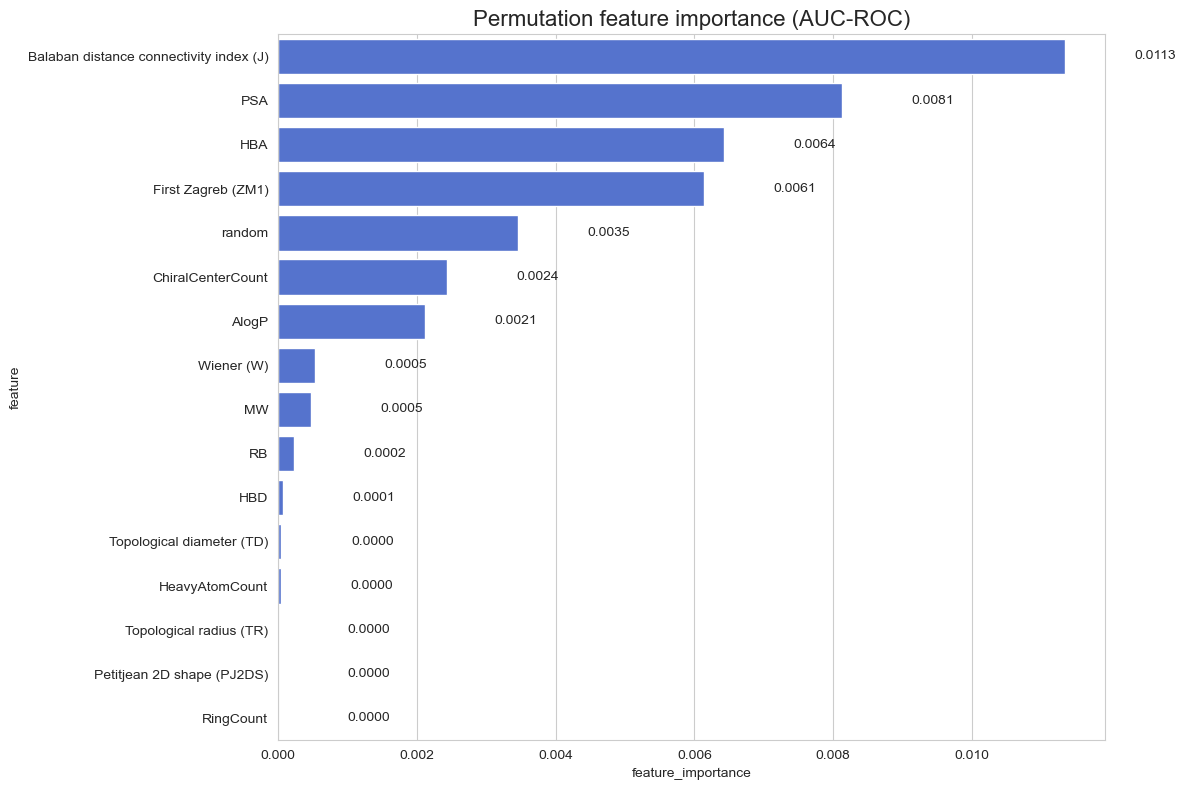


Random feature in permutation importance:
Rank: 5 out of 16 features
Top percentile: 68.75%
Importance value: 0.003458

Calculating drop-column feature importance...
Features ranked by drop-column importance:
                                    feature  feature_importance
0                                    random            0.000143
1                                        MW            0.000000
2                                       HBA            0.000000
3                                     AlogP            0.000000
4                                        RB            0.000000
5                            HeavyAtomCount            0.000000
6                         ChiralCenterCount            0.000000
7                                       HBD            0.000000
8                                 RingCount            0.000000
9                                       PSA            0.000000
10                               Wiener (W)            0.000000
11                    

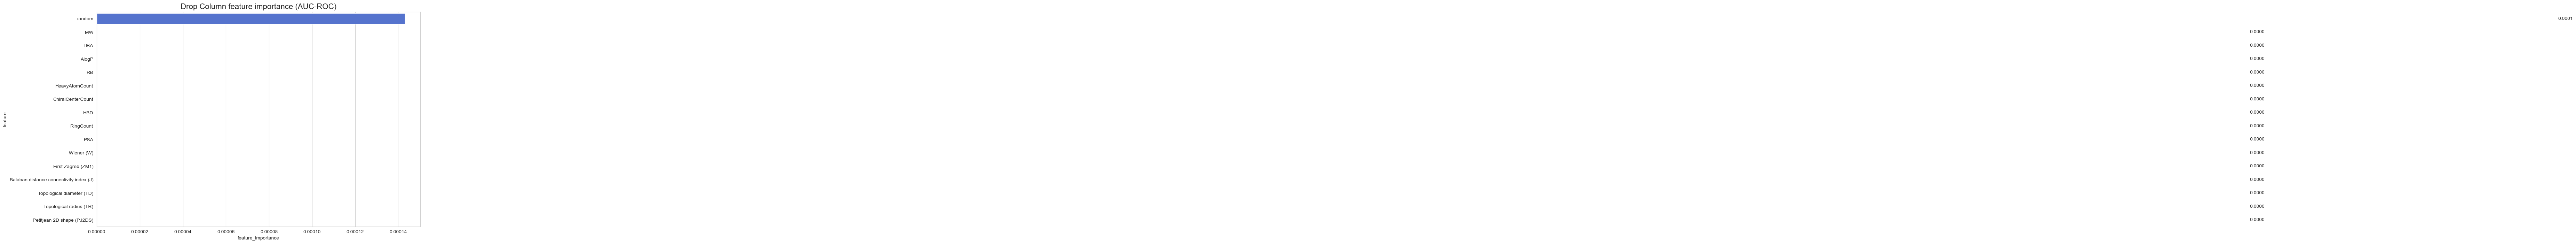


Random feature in drop-column importance:
Rank: 1 out of 16 features
Top percentile: 93.75%
Importance value: 0.000143

Calculating LIME for observation-level feature importance...
Selected active compound index: 311, predicted prob: 1.0000
Selected inactive compound index: 1509, predicted prob: 0.0000

LIME explanation for an active compound (what makes it active):
First Zagreb (ZM1) > 0.67: 0.1141
MW > 0.69: 0.0511
HeavyAtomCount > 0.67: 0.0423
Wiener (W) > 0.40: 0.0281
HBA > 0.84: 0.0253
PSA > 0.45: 0.0236
Balaban distance connectivity index (J) <= -0.46: -0.0202
random <= -0.89: 0.0156
0.06 < Topological radius (TR) <= 0.64: 0.0100
-0.36 < Petitjean 2D shape (PJ2DS) <= 1.01: -0.0073
RingCount > 0.24: 0.0072
-0.60 < AlogP <= 0.00: -0.0056
Topological diameter (TD) > 0.51: -0.0046
ChiralCenterCount <= -0.44: -0.0037
RB > 0.61: -0.0028
0.00 < HBD <= 0.61: -0.0025

LIME explanation for an inactive compound (what contributes against activity):
First Zagreb (ZM1) <= -0.70: -0.1448
MW <=

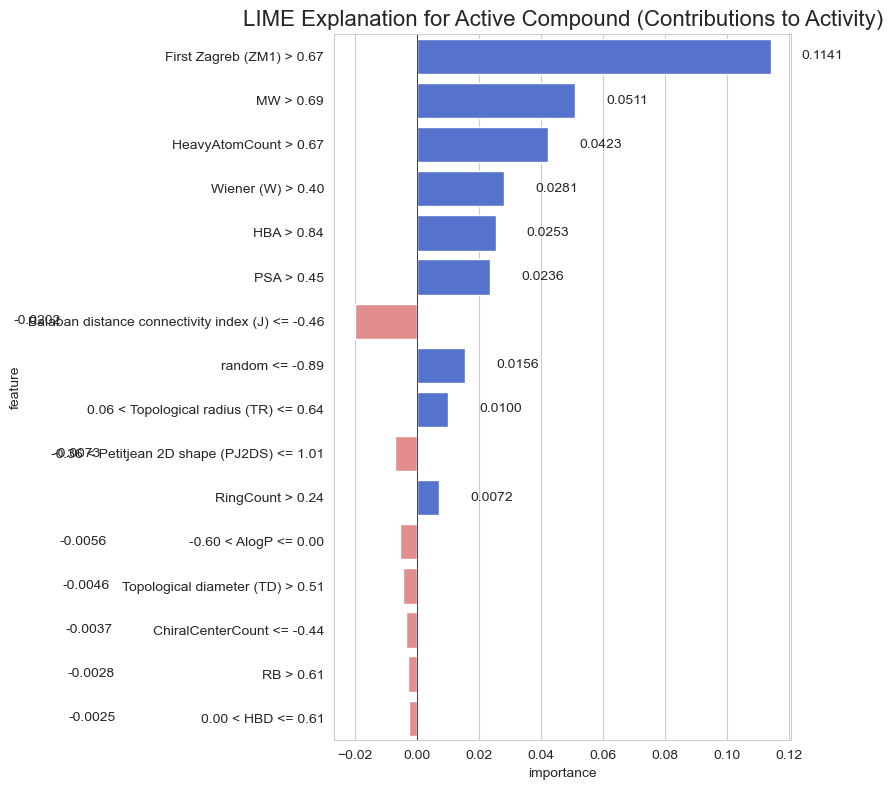

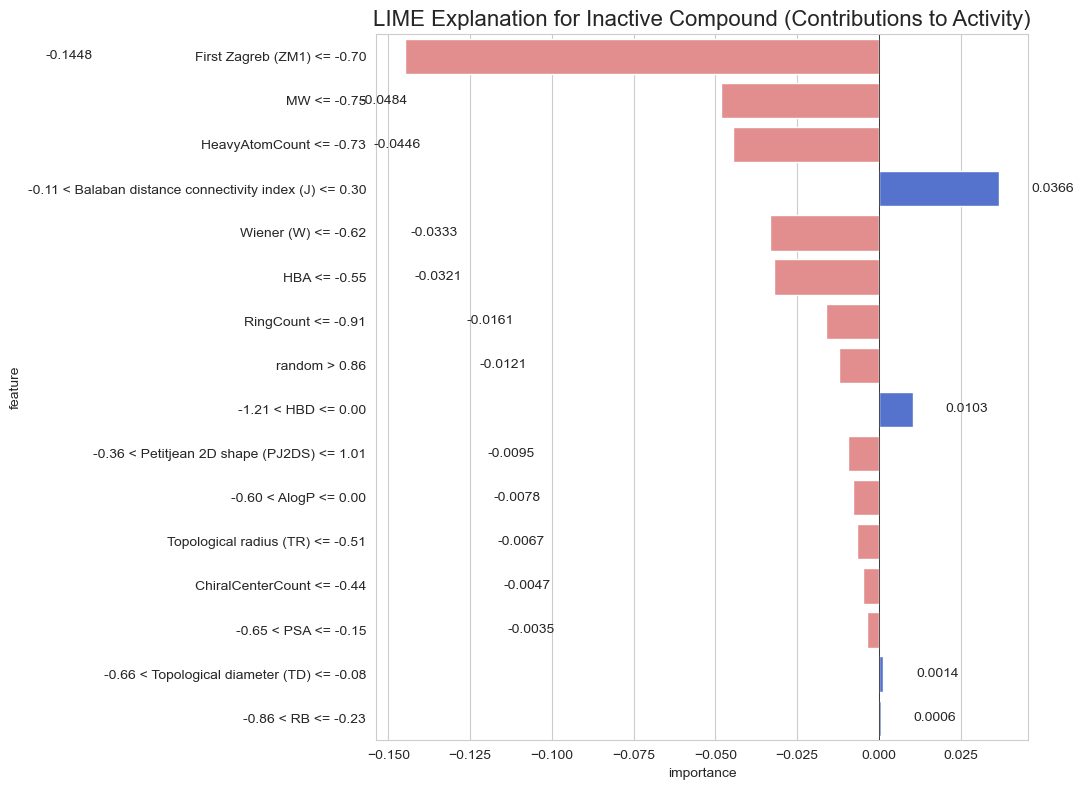


Comparing importance methods:
                                    Feature   Default  Permutation  \
0                                       PSA  0.112297     0.008122   
1                        First Zagreb (ZM1)  0.112072     0.006133   
2   Balaban distance connectivity index (J)  0.108571     0.011342   
3                                        MW  0.093206     0.000475   
4                                Wiener (W)  0.087563     0.000532   
5                                     AlogP  0.084166     0.002123   
6                                    random  0.078745     0.003458   
7                                       HBA  0.059393     0.006428   
8                            HeavyAtomCount  0.053556     0.000038   
9                                        RB  0.042256     0.000228   
10                Topological diameter (TD)  0.039597     0.000050   
11                        ChiralCenterCount  0.034536     0.002435   
12                                      HBD  0.031727     0

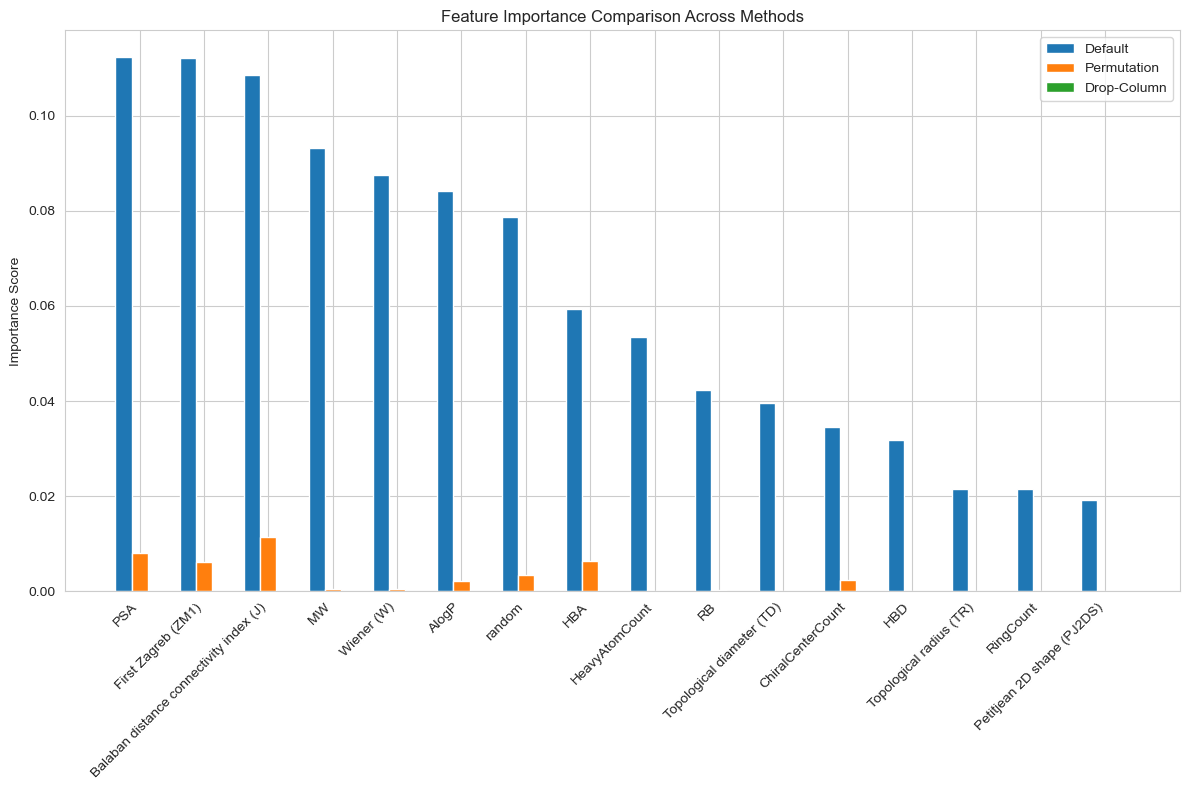


Feature Importance Analysis Complete


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.base import clone
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
import lime
import lime.lime_tabular
import warnings
from sklearn.preprocessing import StandardScaler

# Suppress warnings
warnings.filterwarnings('ignore')

# Set up visualization parameters
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Helper function for feature importance dataframe
def imp_df(column_names, importances):
    """Create a dataframe of feature importances"""
    df = pd.DataFrame({
        'feature': column_names,
        'feature_importance': importances
    }).sort_values('feature_importance', ascending=False).reset_index(drop=True)
    return df

# Visualization function
def var_imp_plot(imp_df, title, figsize=(12, 8)):
    """Plot feature importances as a horizontal bar chart"""
    plt.figure(figsize=figsize)
    ax = sns.barplot(x='feature_importance', y='feature', data=imp_df, orient='h', color='royalblue')
    
    # Add value labels to the bars
    for i, v in enumerate(imp_df['feature_importance']):
        ax.text(max(v + 0.001, 0.001), i, f'{v:.4f}', va='center')
    
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Function to analyze random feature position
def analyze_random_feature(imp_df):
    """Analyze where the random feature ranks in importance"""
    random_row = imp_df[imp_df['feature'] == 'random']
    if len(random_row) == 0:
        return "Random feature not found in results"
    
    random_rank = random_row.index[0] + 1
    random_importance = random_row['feature_importance'].values[0]
    total_features = len(imp_df)
    
    return {
        "rank": random_rank,
        "total_features": total_features, 
        "percentile": 100 * (total_features - random_rank) / total_features,
        "importance_value": random_importance
    }

# Function for LIME visualization
def plot_lime_explanation(exp_list, title):
    """Create a horizontal bar chart from LIME explanation list"""
    features = [item[0] for item in exp_list]
    importances = [item[1] for item in exp_list]
    
    df = pd.DataFrame({
        'feature': features,
        'importance': importances
    })
    df = df.sort_values('importance', key=abs, ascending=False)
    
    plt.figure(figsize=(12, 8))
    colors = ['royalblue' if x > 0 else 'lightcoral' for x in df['importance']]
    ax = sns.barplot(x='importance', y='feature', data=df, palette=colors)
    
    for i, v in enumerate(df['importance']):
        ax.text(v + 0.01 if v >= 0 else v - 0.11, i, f'{v:.4f}', va='center')
    
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Drop column feature importance function for classification
def drop_col_feat_imp(model, X_train, y_train, metric='roc_auc', random_state=42):
    """Calculate feature importance by dropping columns one by one"""
    model_clone = clone(model)
    model_clone.random_state = random_state
    
    model_clone.fit(X_train, y_train)
    
    # Predict with full model for benchmark score
    y_pred_proba = model_clone.predict_proba(X_train)[:, 1]
    if metric == 'roc_auc':
        benchmark_score = roc_auc_score(y_train, y_pred_proba)
    elif metric == 'accuracy':
        y_pred = model_clone.predict(X_train)
        benchmark_score = accuracy_score(y_train, y_pred)
    else:
        raise ValueError("Metric must be 'roc_auc' or 'accuracy'")
    
    importances = []

    # Drop one column at a time and measure performance decrease
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        X_drop = X_train.drop(col, axis=1)
        model_clone.fit(X_drop, y_train)
        
        # Calculate score with dropped column
        if metric == 'roc_auc':
            y_drop_pred_proba = model_clone.predict_proba(X_drop)[:, 1]
            drop_col_score = roc_auc_score(y_train, y_drop_pred_proba)
        else:  # accuracy
            y_drop_pred = model_clone.predict(X_drop)
            drop_col_score = accuracy_score(y_train, y_drop_pred)
            
        importances.append(benchmark_score - drop_col_score)

    return importances

# Load BACE dataset
print("Loading BACE dataset...")
df = pd.read_csv('bace.csv')

# Select interpretable features for analysis
print("Selecting molecular descriptors...")
# Basic physicochemical properties
basic_descriptors = ['MW', 'AlogP', 'HBA', 'HBD', 'RB', 'HeavyAtomCount', 'ChiralCenterCount', 'RingCount', 'PSA']

# Topological and shape indexes (select a few representative ones)
topological_descriptors = ['First Zagreb (ZM1)', 'Wiener (W)', 'Balaban distance connectivity index (J)',
                           'Topological diameter (TD)', 'Topological radius (TR)', 'Petitjean 2D shape (PJ2DS)']

# Ring information
ring_descriptors = ['RNGCNT3', 'RNGCNT4', 'RNGCNT5', 'RNGCNT6', 'CYCLONUM', 'NRS']

# Selected descriptors
selected_descriptors = basic_descriptors + topological_descriptors + ring_descriptors

# Verify columns exist in dataframe
valid_descriptors = [col for col in selected_descriptors if col in df.columns]
print(f"Using {len(valid_descriptors)} descriptors: {valid_descriptors}")

# Prepare features and target
X = df[valid_descriptors].copy()
y = df['Class']  # Binary classification: active (1) or inactive (0)

# Check for missing values
missing_vals = X.isnull().sum().sum()
if missing_vals > 0:
    print(f"Found {missing_vals} missing values. Filling with median values.")
    X = X.fillna(X.median())

# Add a random feature (as in the previous examples)
np.random.seed(42)
X['random'] = np.random.random(size=len(X))

# Split into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train set: {X_train.shape}, Validation set: {X_valid.shape}")
print(f"Class distribution in train set: {pd.Series(y_train).value_counts().to_dict()}")
print(f"Class distribution in validation set: {pd.Series(y_valid).value_counts().to_dict()}")

# Scale the features for better model performance
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns, index=X_valid.index)

# Check correlation between features and target
correlations = {}
for col in X.columns:
    point_biserial = np.corrcoef(X[col], y)[0, 1]
    correlations[col] = point_biserial

correlations_df = pd.DataFrame({
    'feature': list(correlations.keys()),
    'correlation': list(correlations.values())
}).sort_values('correlation', key=abs, ascending=False)

print("\nFeature correlations with target (BACE activity):")
print(correlations_df)

# Visualize correlations
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='correlation', y='feature', data=correlations_df, orient='h')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.title("Feature Correlations with BACE Activity", fontsize=16)
for i, v in enumerate(correlations_df['correlation']):
    ax.text(v + 0.01 if v >= 0 else v - 0.1, i, f'{v:.4f}', va='center')
plt.tight_layout()
plt.show()

# Train Random Forest model
print("\nTraining Random Forest classification model...")
rf = RandomForestClassifier(
    n_estimators=100,
    n_jobs=-1,
    oob_score=True,
    random_state=42,
    class_weight='balanced'
)
rf.fit(X_train_scaled, y_train)

# Evaluate model performance
y_train_pred = rf.predict(X_train_scaled)
y_valid_pred = rf.predict(X_valid_scaled)
y_train_proba = rf.predict_proba(X_train_scaled)[:, 1]
y_valid_proba = rf.predict_proba(X_valid_scaled)[:, 1]

train_acc = accuracy_score(y_train, y_train_pred)
valid_acc = accuracy_score(y_valid, y_valid_pred)
train_auc = roc_auc_score(y_train, y_train_proba)
valid_auc = roc_auc_score(y_valid, y_valid_proba)
oob_score = rf.oob_score_

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {valid_acc:.4f}")
print(f"Training AUC-ROC: {train_auc:.4f}")
print(f"Validation AUC-ROC: {valid_auc:.4f}")
print(f"OOB Score: {oob_score:.4f}")

# Show confusion matrix and classification report
print("\nConfusion Matrix (Validation Set):")
cm = confusion_matrix(y_valid, y_valid_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_valid, y_valid_pred))

# Default Scikit-learn feature importance
print("\nCalculating default Scikit-learn feature importances...")
base_imp = imp_df(X_train.columns, rf.feature_importances_)
print("Features ranked by default importance:")
print(base_imp)

# Plot features
var_imp_plot(base_imp, 'Default feature importance (scikit-learn)')

# Analyze random feature in default importance
default_random_analysis = analyze_random_feature(base_imp)
print("\nRandom feature in default importance:")
print(f"Rank: {default_random_analysis['rank']} out of {default_random_analysis['total_features']} features")
print(f"Top percentile: {default_random_analysis['percentile']:.2f}%")
print(f"Importance value: {default_random_analysis['importance_value']:.6f}")

# Permutation feature importance
print("\nCalculating permutation feature importance...")
perm_result = permutation_importance(rf, X_train_scaled, y_train, 
                                    n_repeats=10, random_state=42,
                                    scoring='roc_auc')
perm_imp_sklearn = imp_df(X_train.columns, perm_result.importances_mean)
print("Features ranked by permutation importance:")
print(perm_imp_sklearn)

# Plot features
var_imp_plot(perm_imp_sklearn, 'Permutation feature importance (AUC-ROC)')

# Analyze random feature in permutation importance
perm_random_analysis = analyze_random_feature(perm_imp_sklearn)
print("\nRandom feature in permutation importance:")
print(f"Rank: {perm_random_analysis['rank']} out of {perm_random_analysis['total_features']} features")
print(f"Top percentile: {perm_random_analysis['percentile']:.2f}%")
print(f"Importance value: {perm_random_analysis['importance_value']:.6f}")

# Drop-column feature importance
print("\nCalculating drop-column feature importance...")
drop_imp = drop_col_feat_imp(rf, X_train_scaled, y_train, metric='roc_auc')
drop_imp_df = imp_df(X_train.columns, drop_imp)
print("Features ranked by drop-column importance:")
print(drop_imp_df)

# Plot features
var_imp_plot(drop_imp_df, 'Drop Column feature importance (AUC-ROC)')

# Analyze random feature in drop-column importance
drop_random_analysis = analyze_random_feature(drop_imp_df)
print("\nRandom feature in drop-column importance:")
print(f"Rank: {drop_random_analysis['rank']} out of {drop_random_analysis['total_features']} features")
print(f"Top percentile: {drop_random_analysis['percentile']:.2f}%")
print(f"Importance value: {drop_random_analysis['importance_value']:.6f}")

# LIME for observation-level feature importance
print("\nCalculating LIME for observation-level feature importance...")

# Find one clear example of each class with high prediction confidence
# Fix: Ensure we're working with proper indices after the train/test split
train_indices = X_train.index.tolist()
train_predictions = list(zip(train_indices, y_train, y_train_proba))

# Best active compound (high probability of class 1)
active_samples = [(idx, prob) for idx, label, prob in train_predictions if label == 1]
best_active_idx, best_active_prob = max(active_samples, key=lambda x: x[1])

# Best inactive compound (low probability of class 1)
inactive_samples = [(idx, prob) for idx, label, prob in train_predictions if label == 0]
best_inactive_idx, best_inactive_prob = min(inactive_samples, key=lambda x: x[1])

print(f"Selected active compound index: {best_active_idx}, predicted prob: {best_active_prob:.4f}")
print(f"Selected inactive compound index: {best_inactive_idx}, predicted prob: {best_inactive_prob:.4f}")

# Create LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_scaled.values,
    mode='classification',
    feature_names=X_train_scaled.columns,
    class_names=['Inactive', 'Active'],
    discretize_continuous=True
)

# Get the scaled values for the selected compounds
active_scaled = X_train_scaled.loc[best_active_idx].values
inactive_scaled = X_train_scaled.loc[best_inactive_idx].values

# Explain the active compound
np.random.seed(42)
exp_active = explainer.explain_instance(
    active_scaled, 
    rf.predict_proba, 
    num_features=len(X_train_scaled.columns)
)
active_explanation = exp_active.as_list(label=1)  # Label 1 is the "Active" class
print("\nLIME explanation for an active compound (what makes it active):")
for feature, importance in active_explanation:
    print(f"{feature}: {importance:.4f}")

# Explain the inactive compound
np.random.seed(42)
exp_inactive = explainer.explain_instance(
    inactive_scaled, 
    rf.predict_proba, 
    num_features=len(X_train_scaled.columns)
)
inactive_explanation = exp_inactive.as_list(label=1)  # Label 1 is the "Active" class
print("\nLIME explanation for an inactive compound (what contributes against activity):")
for feature, importance in inactive_explanation:
    print(f"{feature}: {importance:.4f}")

# Visualize LIME explanations
plot_lime_explanation(active_explanation, 'LIME Explanation for Active Compound (Contributions to Activity)')
plot_lime_explanation(inactive_explanation, 'LIME Explanation for Inactive Compound (Contributions to Activity)')

# Compare the three importance methods side by side
print("\nComparing importance methods:")
importance_comparison = pd.DataFrame({
    'Feature': base_imp['feature'],
    'Default': base_imp['feature_importance'],
    'Permutation': [perm_imp_sklearn[perm_imp_sklearn['feature'] == feat]['feature_importance'].values[0] 
                   for feat in base_imp['feature']],
    'Drop-Column': [drop_imp_df[drop_imp_df['feature'] == feat]['feature_importance'].values[0] 
                  for feat in base_imp['feature']]
})

print(importance_comparison)

# Create a grouped bar chart for method comparison
features = importance_comparison['Feature']
default = importance_comparison['Default']
permutation = importance_comparison['Permutation']
drop_column = importance_comparison['Drop-Column']

plt.figure(figsize=(12, 8))
x = np.arange(len(features))
width = 0.25

plt.bar(x - width, default, width, label='Default')
plt.bar(x, permutation, width, label='Permutation')
plt.bar(x + width, drop_column, width, label='Drop-Column')

plt.ylabel('Importance Score')
plt.title('Feature Importance Comparison Across Methods')
plt.xticks(x, features, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

print("\nFeature Importance Analysis Complete")